In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
start = time.time()
#read data in chunks of 1 million rows at a time
chunk1 = pd.read_csv('I:\\verisetleri1\\CIC-ToN-IoT\\X_train.csv',chunksize=1000000)
chunk2 = pd.read_csv('I:\\verisetleri1\\CIC-ToN-IoT\\X_test.csv',chunksize=1000000)
chunk3 = pd.read_csv('I:\\verisetleri1\\CIC-ToN-IoT\\y_test.csv',chunksize=1000000)
chunk4 = pd.read_csv('I:\\verisetleri1\\CIC-ToN-IoT\\y_train.csv',chunksize=1000000)


x_train = pd.concat(chunk1)
x_test  = pd.concat(chunk2)
y_train = pd.concat(chunk3)
y_test  = pd.concat(chunk4)

X_train= x_train.drop(['Unnamed: 0'], axis=1)
X_test= x_test.drop(['Unnamed: 0'], axis=1)
Y_train= y_train.drop(['Unnamed: 0'], axis=1)
Y_test= y_test.drop(['Unnamed: 0'], axis=1)

In [3]:
Y_test=Y_test['15']
Y_train=Y_train['15']

In [8]:
import math
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.layers import BatchNormalization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [ ]:
y_train1 = to_categorical(Y_train, num_classes=2)
y_test1 = to_categorical(Y_test, num_classes=2)

In [10]:
### reshape input data to LSTM format [samples, time_steps, features]
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam
import keras
from keras.layers.convolutional import Conv1D 
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

In [12]:
from tensorflow.keras.layers import BatchNormalization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [13]:
from tensorflow.keras.layers import BatchNormalization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle 

In [16]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LSTM, Dropout, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import backend as K

num_folds = 5
verbosity = 1
n_classes = 2
n_features = X_train_lstm.shape[2]
activation = 'relu'
batch_size = 1024
dropout_rate = 0.2
epochs = 500
kernel_initializer = 'normal'
lstm_units_1 = 50
lstm_units_2 = 30
lstm_units_3 = 50
optimizer = 'Adamax'


inputs = X_train_lstm
targets = Y_train

callback_early_stopping = EarlyStopping(patience=20, mode='min', restore_best_weights=True)
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    K.clear_session()  # Clear previous model sessions
    
     # Modeli oluşturma
    model = Sequential()
    model.add(LSTM(units=lstm_units_1, activation=activation, kernel_initializer=kernel_initializer, return_sequences=True, input_shape=(timesteps, features)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units_2, activation=activation, kernel_initializer=kernel_initializer, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units_3, activation=activation, kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='softmax'))

    # Modeli derleme
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    history = model.fit(inputs[train], targets[train], validation_split=0.2, 
                        callbacks=[callback_early_stopping, callback_reduce_lr],
                        batch_size=batch_size,
                        epochs=no_epochs,
                        verbose=verbosity)

    scores = model.evaluate(inputs[test], targets[test], verbose=1)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

    # Değerlendirme metriklerini hesapla
    true_labels = targets[test]

    predictions = model.predict(inputs[test])
    predicted_labels = np.argmax(predictions, axis=1)  # Varsayılan olarak sınıfların en yüksek olasılığına göre tahminler

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')

    print(f'Accuracy: {accuracy:.5f}, Precision: {precision:.5f}, Recall: {recall:.5f}')
    fold_no += 1

------------------------------------------------------------------------
Training...
Epoch 1/500
2927/2927 [==============================] - 62s 17ms/step - loss: 0.0603 - accuracy: 0.9809 - val_loss: 0.0331 - val_accuracy: 0.9901
Epoch 2/500
2927/2927 [==============================] - 47s 16ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0261 - val_accuracy: 0.9915
Epoch 3/500
2927/2927 [==============================] - 46s 16ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0237 - val_accuracy: 0.9914
Epoch 4/500
2927/2927 [==============================] - 46s 16ms/step - loss: 0.0249 - accuracy: 0.9913 - val_loss: 0.0219 - val_accuracy: 0.9919
Epoch 5/500
2927/2927 [==============================] - 45s 15ms/step - loss: 0.0235 - accuracy: 0.9915 - val_loss: 0.0212 - val_accuracy: 0.9918
Epoch 6/500
2927/2927 [==============================] - 45s 15ms/step - loss: 0.0226 - accuracy: 0.9917 - val_loss: 0.0200 - val_accuracy: 0.9923
Epoch 7/500
2927/2927 [==========

In [17]:
def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance

In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y_resample, labels, title): 
    y_cat = to_categorical(y_resample)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
#     print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [19]:
# predicting on training set
y_train_pred_prob = model.predict(X_train_lstm)
y_test_pred_prob = model.predict(X_test_lstm)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

In [20]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = preprocessing.LabelEncoder()
    
y_trainc = le.fit_transform(y_train)

In [21]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_train)

performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
performance

,accuracy,precision,recall,f1_score
0,0.9934,0.9885,0.9974,0.993
1,0.9934,0.9977,0.9899,0.9938


In [22]:
y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_true_labels = le.inverse_transform(y_test)
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance

,accuracy,precision,recall,f1_score
0,0.9934,0.9975,0.9885,0.993
1,0.9934,0.9899,0.9978,0.9938


In [23]:
import time

start = time.time()
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance
end = time.time()
print(end - start)

0.41854333877563477


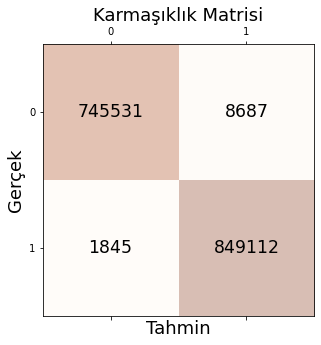

In [24]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Tahmin', fontsize=18)
plt.ylabel('Gerçek', fontsize=18)
plt.title('Karmaşıklık Matrisi', fontsize=18)
plt.show()